In [1]:
!git clone https://github.com/bowang-lab/MedSAM

Cloning into 'MedSAM'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (354/354), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 967 (delta 286), reused 237 (delta 237), pack-reused 613 (from 2)
Receiving objects: 100% (967/967), 62.89 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (479/479), done.


In [2]:
!pip install -q git+https://github.com/bowang-lab/MedSAM.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.8 MB/s eta 0:00:00


In [3]:
# CONFIGURABLE PATHS

# Base configuration
base_path = "/content"

# Core paths derived from base_path
content_path = base_path
task_path = f"{base_path}/drive/MyDrive/MSD"
medsam_ckpt_path = f"{base_path}/medsam_vit_b.pth"
extract_dir = f"{base_path}/msd_data"
checkpoint_dir = f"{base_path}/sequential_checkpoints"
sam_work_dir = f"{base_path}/MedSAM/work_dir/SAM"
save_dir = f"{base_path}/checkpoints"
tmp_dir = f"{base_path}/tmp"

# TASK CONFIGURATION - Control number of tasks to process
task_amount = 5  # Change this to control how many tasks to extract and train

# Create directories if they don't exist
import os
os.makedirs(task_path, exist_ok=True)
os.makedirs(extract_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)
os.makedirs(tmp_dir, exist_ok=True)

# Print configuration for verification
print("PATH CONFIGURATION:")
print(f"  • Base path: {base_path}")
print(f"  • Content path: {content_path}")
print(f"  • Task path: {task_path}")
print(f"  • MedSAM checkpoint: {medsam_ckpt_path}")
print(f"  • Extract directory: {extract_dir}")
print(f"  • Checkpoint directory: {checkpoint_dir}")
print(f"  • SAM work directory: {sam_work_dir}")
print(f"  • Save directory: {save_dir}")
print(f"  • Temporary directory: {tmp_dir}")
print(f"\nTASK CONFIGURATION:")
print(f"  • Number of tasks to process: {task_amount}")
print("\nAll paths configured and directories created!")

PATH CONFIGURATION:
  • Base path: /content
  • Content path: /content
  • Task path: /content/drive/MyDrive/MSD
  • MedSAM checkpoint: /content/medsam_vit_b.pth
  • Extract directory: /content/msd_data
  • Checkpoint directory: /content/sequential_checkpoints
  • SAM work directory: /content/MedSAM/work_dir/SAM
  • Save directory: /content/checkpoints
  • Temporary directory: /content/tmp

TASK CONFIGURATION:
  • Number of tasks to process: 5

All paths configured and directories created!


In [4]:
# download model and data
!wget -O img_demo.png https://raw.githubusercontent.com/bowang-lab/MedSAM/main/assets/img_demo.png
!wget -O {medsam_ckpt_path.split('/')[-1]} https://zenodo.org/records/10689643/files/medsam_vit_b.pth

--2025-06-03 13:18:54--  https://raw.githubusercontent.com/bowang-lab/MedSAM/main/assets/img_demo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87865 (86K) [image/png]
Saving to: ‘img_demo.png’

img_demo.png        100%[===================>]  85.81K  --.-KB/s    in 0.002s  

2025-06-03 13:18:54 (40.9 MB/s) - ‘img_demo.png’ saved [87865/87865]

--2025-06-03 13:18:54--  https://zenodo.org/records/10689643/files/medsam_vit_b.pth
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375049145 (358M) [application/octet-stream]
Saving to: ‘medsam_vit_b.pth’

medsam_vit_b.pth    100%[==================

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# checkpoint
!mkdir -p {sam_work_dir}
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -P {sam_work_dir}

--2025-06-03 13:24:23--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.121, 108.157.254.15, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘/content/MedSAM/work_dir/SAM/sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   296MB/s    in 1.2s    

2025-06-03 13:24:24 (296 MB/s) - ‘/content/MedSAM/work_dir/SAM/sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [8]:
# %% environment and functions
import numpy as np
import matplotlib.pyplot as plt
import os
join = os.path.join
import torch
from segment_anything import sam_model_registry
from skimage import io, transform
import torch.nn.functional as F

# visualization functions
# source: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
# change color to avoid red and green
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([251/255, 252/255, 30/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='blue', facecolor=(0,0,0,0), lw=2))

@torch.no_grad()
def medsam_inference(medsam_model, img_embed, box_1024, H, W):
    box_torch = torch.as_tensor(box_1024, dtype=torch.float, device=img_embed.device)
    if len(box_torch.shape) == 2:
        box_torch = box_torch[:, None, :] # (B, 1, 4)

    sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
        points=None,
        boxes=box_torch,
        masks=None,
    )
    low_res_logits, _ = medsam_model.mask_decoder(
        image_embeddings=img_embed, # (B, 256, 64, 64)
        image_pe=medsam_model.prompt_encoder.get_dense_pe(), # (1, 256, 64, 64)
        sparse_prompt_embeddings=sparse_embeddings, # (B, 2, 256)
        dense_prompt_embeddings=dense_embeddings, # (B, 256, 64, 64)
        multimask_output=False,
        )

    low_res_pred = torch.sigmoid(low_res_logits)  # (1, 1, 256, 256)

    low_res_pred = F.interpolate(
        low_res_pred,
        size=(H, W),
        mode="bilinear",
        align_corners=False,
    )  # (1, 1, gt.shape)
    low_res_pred = low_res_pred.squeeze().cpu().numpy()  # (256, 256)
    medsam_seg = (low_res_pred > 0.5).astype(np.uint8)
    return medsam_seg

In [10]:
#%% load model and image
MedSAM_CKPT_PATH = medsam_ckpt_path
device = "cuda:0"
medsam_model = sam_model_registry['vit_b'](checkpoint=MedSAM_CKPT_PATH)
medsam_model = medsam_model.to(device)
medsam_model.eval()

img_np = io.imread('ctphoto.jpg') #demo image
if len(img_np.shape) == 2:
    img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
else:
    img_3c = img_np
H, W, _ = img_3c.shape

In [11]:
#%% image preprocessing and model inference
img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
img_1024 = (img_1024 - img_1024.min()) / np.clip(
    img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
)  # normalize to [0, 1], (H, W, 3)
# convert the shape to (3, H, W)
img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

#set bounding box Ax,Ay,Bx,By
box_np = np.array([[35,50, 150, 150]])

# transfer box_np t0 1024x1024 scale
box_1024 = box_np / np.array([W, H, W, H]) * 1024
with torch.no_grad():
    image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)

medsam_seg = medsam_inference(medsam_model, image_embedding, box_1024, H, W)

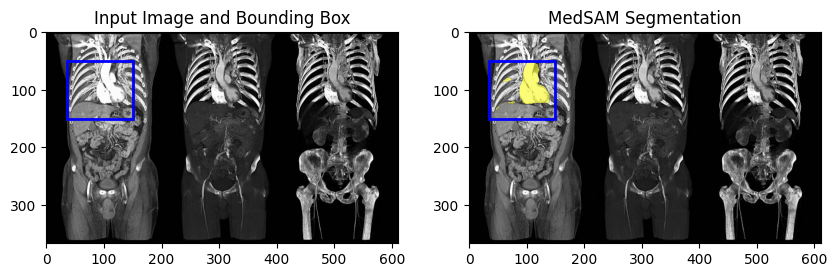

In [12]:
#%% visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_3c)
show_box(box_np[0], ax[0])
ax[0].set_title("Input Image and Bounding Box")
ax[1].imshow(img_3c)
show_mask(medsam_seg, ax[1])
show_box(box_np[0], ax[1])
ax[1].set_title("MedSAM Segmentation")
plt.show()

In [13]:
#Import libraries and dependencies
import os
import json
import tarfile
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import transform, measure
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from segment_anything import sam_model_registry
import torch.nn.functional as F
from tqdm import tqdm
import random
from pathlib import Path
import pickle

join = os.path.join
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Current device: {torch.cuda.current_device()}")
print(f"Device count: {torch.cuda.device_count()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")

Using device: cuda
CUDA available: True
Current device: 0
Device count: 1
Device name: Tesla T4


In [ ]:
!mkdir -p /content/MSD
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task01_BrainTumour.tar -P /content/MSD/ #brain
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task02_Heart.tar -P /content/MSD/ #Heart
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task03_Liver.tar -P /content/MSD/ #liver
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task04_Hippocampus.tar -P /content/MSD/ #hippo
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task05_Prostate.tar -P /content/MSD/ #prostates
#!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task06_Lung.tar -P /content/MSD/ #lung
#!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar -P /content/MSD/ #pancreas
#!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task08_HepaticVessel.tar -P /content/MSD/ #Vessel
#!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar -P /content/MSD/ #spleen
#!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task10_Colon.tar -P /content/MSD/ #colon

In [14]:
# Adapter modules implementation
class LoRAAdapter(nn.Module):
    """Low-Rank Adaptation (LoRA) adapter"""
    def __init__(self, in_features: int, out_features: int, rank: int = 4, alpha: float = 1.0):
        super().__init__()
        self.rank = rank
        self.alpha = alpha
        self.scaling = alpha / rank

        # LoRA matrices
        self.lora_A = nn.Parameter(torch.randn(rank, in_features) * 0.01)
        self.lora_B = nn.Parameter(torch.zeros(out_features, rank))

    def forward(self, x):
        # x shape: (batch_size, seq_len, in_features) or (batch_size, in_features)
        return (x @ self.lora_A.T @ self.lora_B.T) * self.scaling

class AdapterLayer(nn.Module):
    """Bottleneck adapter layer"""
    def __init__(self, hidden_dim: int, bottleneck_dim: int = 64, dropout: float = 0.1):
        super().__init__()
        self.down_proj = nn.Linear(hidden_dim, bottleneck_dim)
        self.up_proj = nn.Linear(bottleneck_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_dim)

        # Initialize weights
        nn.init.normal_(self.down_proj.weight, std=0.02)
        nn.init.zeros_(self.down_proj.bias)
        nn.init.zeros_(self.up_proj.weight)
        nn.init.zeros_(self.up_proj.bias)

    def forward(self, x):
        residual = x
        x = self.down_proj(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.up_proj(x)
        x = residual + x  # Residual connection
        x = self.layer_norm(x)
        return x

class ConvAdapter(nn.Module):
    """Convolutional adapter for feature maps"""
    def __init__(self, in_channels: int, bottleneck_channels: int = 64):
        super().__init__()
        self.adapter = nn.Sequential(
            nn.Conv2d(in_channels, bottleneck_channels, 1),
            nn.BatchNorm2d(bottleneck_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(bottleneck_channels, in_channels, 1),
            nn.BatchNorm2d(in_channels)
        )

        # Initialize to identity mapping
        nn.init.zeros_(self.adapter[-2].weight)
        nn.init.zeros_(self.adapter[-2].bias)

    def forward(self, x):
        return x + self.adapter(x)

In [15]:
# Enhanced SAM with adapters
class AdaptedSAM(nn.Module):
    """SAM model with adapters integrated - FIXED gradient flow"""
    def __init__(self, sam_model, adapter_config):
        super().__init__()
        self.sam = sam_model
        self.adapter_config = adapter_config
        self.adapters = nn.ModuleDict()

        # Add adapters based on configuration
        self._add_adapters()

        # Freeze original SAM parameters EXCEPT image encoder blocks we want to modify
        self._freeze_sam_parameters()

        for name, module in self.named_children():
            module.to(device)

    def _freeze_sam_parameters(self):
        """Freeze SAM parameters but keep some unfrozen for gradient flow"""
        # Freeze most SAM parameters
        for name, param in self.sam.named_parameters():
            param.requires_grad = False

        # CRITICAL FIX: Unfreeze some key components for gradient flow
        # Keep image encoder's layer norm parameters trainable for gradient flow
        norm_count = 0
        for name, param in self.sam.image_encoder.named_parameters():
            if 'norm' in name or 'ln' in name:
                param.requires_grad = True
                norm_count += 1

        # Unfreeze adapter parameters
        adapter_count = 0
        for adapter_name, adapter in self.adapters.items():
            for param in adapter.parameters():
                param.requires_grad = True
                adapter_count += 1

        # Summary without detailed prints
        trainable = sum(p.numel() for p in self.parameters() if p.requires_grad)
        total = sum(p.numel() for p in self.parameters())
        print(f"Model ready: {trainable:,} trainable / {total:,} total params ({100*trainable/total:.1f}%)")

    def _add_adapters(self):
        """Add adapters to different parts of SAM"""
        config = self.adapter_config

        # Image encoder adapters
        if config.get('image_encoder_adapters', False):
            self._add_image_encoder_adapters()

        # Prompt encoder adapters
        if config.get('prompt_encoder_adapters', False):
            self._add_prompt_encoder_adapters()

        # Mask decoder adapters
        if config.get('mask_decoder_adapters', False):
            self._add_mask_decoder_adapters()

    def _add_image_encoder_adapters(self):
        """Add adapters to image encoder (ViT blocks)"""
        config = self.adapter_config

        # Add adapters to attention and MLP layers
        for i, block in enumerate(self.sam.image_encoder.blocks):
            # Attention adapter
            if config.get('attention_adapters', True):
                attn_dim = block.attn.qkv.in_features
                self.adapters[f'attn_adapter_{i}'] = AdapterLayer(
                    attn_dim,
                    config.get('bottleneck_dim', 64),
                    config.get('dropout', 0.1)
                )

            # MLP adapter
            if config.get('mlp_adapters', True):
                mlp_dim = block.mlp.lin1.in_features
                self.adapters[f'mlp_adapter_{i}'] = AdapterLayer(
                    mlp_dim,
                    config.get('bottleneck_dim', 64),
                    config.get('dropout', 0.1)
                )

    def _add_prompt_encoder_adapters(self):
        """Add adapters to prompt encoder"""
        config = self.adapter_config

        # Point embedding adapter
        if hasattr(self.sam.prompt_encoder, 'point_embeddings'):
            embed_dim = self.sam.prompt_encoder.embed_dim
            self.adapters['point_embed_adapter'] = AdapterLayer(
                embed_dim,
                config.get('bottleneck_dim', 64),
                config.get('dropout', 0.1)
            )

    def _add_mask_decoder_adapters(self):
        """Add adapters to mask decoder"""
        config = self.adapter_config

        # Transformer block adapters
        for i, layer in enumerate(self.sam.mask_decoder.transformer.layers):
            # Self-attention adapter
            if hasattr(layer, 'self_attn'):
                embed_dim = layer.self_attn.embedding_dim
                self.adapters[f'decoder_self_attn_adapter_{i}'] = AdapterLayer(
                    embed_dim,
                    config.get('bottleneck_dim', 64),
                    config.get('dropout', 0.1)
                )

            # Cross-attention adapter
            if hasattr(layer, 'cross_attn_token_to_image'):
                embed_dim = layer.cross_attn_token_to_image.embedding_dim
                self.adapters[f'decoder_cross_attn_adapter_{i}'] = AdapterLayer(
                    embed_dim,
                    config.get('bottleneck_dim', 64),
                    config.get('dropout', 0.1)
                )

    def forward_image_encoder(self, x):
        """Forward pass through image encoder with adapters - FIXED for gradient flow"""
        # Resize input to 1024x1024 if needed
        if x.shape[-1] != 1024 or x.shape[-2] != 1024:
            x = F.interpolate(x, size=(1024, 1024), mode='bilinear', align_corners=False)

        # CRITICAL FIX: Reimplement forward to maintain gradients
        # Patch embedding
        x = self.sam.image_encoder.patch_embed(x)

        # Add position embeddings
        if self.sam.image_encoder.pos_embed is not None:
            x = x + self.sam.image_encoder.pos_embed

        # Pass through transformer blocks WITH adapters
        for i, block in enumerate(self.sam.image_encoder.blocks):
            # Store input for residual
            residual = x

            # Attention
            x = block.norm1(x)
            x = block.attn(x)

            # Apply attention adapter if available
            if f'attn_adapter_{i}' in self.adapters:
                x = self.adapters[f'attn_adapter_{i}'](x)

            x = residual + x

            # MLP
            residual = x
            x = block.norm2(x)
            x = block.mlp(x)

            # Apply MLP adapter if available
            if f'mlp_adapter_{i}' in self.adapters:
                x = self.adapters[f'mlp_adapter_{i}'](x)

            x = residual + x

        # Apply neck
        x = self.sam.image_encoder.neck(x.permute(0, 3, 1, 2))
        return x

    def forward(self, batched_input, multimask_output=False):
        """Forward pass with adapters"""
        # ALWAYS use custom image encoder to ensure adapter activation
        images = batched_input.get("image", None)
        if images is not None:
            image_embeddings = self.forward_image_encoder(images)
        else:
            image_embeddings = batched_input.get("image_embeddings", None)

        # For now, use original prompt encoder and mask decoder
        # Create a modified batched_input with our embeddings
        modified_input = batched_input.copy()
        modified_input["image_embeddings"] = image_embeddings
        modified_input.pop("image", None)  # Remove original image

        return self.sam.forward(modified_input, multimask_output)

    def debug_gradients(self):
        """Debug gradient flow"""
        trainable_params = 0
        total_params = 0

        print("\n=== Gradient Debug ===")
        for name, param in self.named_parameters():
            total_params += param.numel()
            if param.requires_grad:
                trainable_params += param.numel()
                print(f"✓ {name}: requires_grad=True, shape={param.shape}")

        print(f"Trainable: {trainable_params:,} / Total: {total_params:,}")
        print("=" * 30)

    def get_trainable_parameters(self):
        """Get only trainable (adapter) parameters"""
        return [param for param in self.parameters() if param.requires_grad]

    def print_trainable_parameters(self):
        """Print statistics about trainable parameters"""
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        total_params = sum(p.numel() for p in self.parameters())

        print(f"Trainable parameters: {trainable_params:,}")
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable percentage: {100 * trainable_params / total_params:.2f}%")

In [16]:
import os
import json
import random
import numpy as np
from skimage import transform
import tarfile
import gc
import psutil
import torch

# Memory optimization utilities
def clear_memory():
    """Clear GPU and CPU memory"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()

def get_memory_usage():
    """Get current memory usage"""
    # CPU memory
    cpu_percent = psutil.virtual_memory().percent
    cpu_available = psutil.virtual_memory().available / (1024**3)  # GB

    # GPU memory if available
    gpu_info = ""
    if torch.cuda.is_available():
        gpu_allocated = torch.cuda.memory_allocated() / (1024**3)  # GB
        gpu_cached = torch.cuda.memory_reserved() / (1024**3)  # GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)  # GB
        gpu_info = f"GPU: {gpu_allocated:.1f}GB allocated, {gpu_cached:.1f}GB cached, {gpu_total:.1f}GB total"

    return f"CPU: {cpu_percent:.1f}% used, {cpu_available:.1f}GB available. {gpu_info}"

#Extract and organize all MSD datasets
def extract_msd_dataset(tar_path, extract_dir):
    """Extract MSD tar file and organize data"""
    print(f"Extracting {tar_path}...")

    # Clear the extract directory for this specific extraction
    task_name = os.path.basename(tar_path).replace('.tar', '')
    specific_extract_dir = os.path.join(extract_dir, f"temp_{task_name}")

    # Remove existing temp directory if it exists
    if os.path.exists(specific_extract_dir):
        import shutil
        shutil.rmtree(specific_extract_dir)

    os.makedirs(specific_extract_dir, exist_ok=True)

    with tarfile.open(tar_path, 'r') as tar:
        tar.extractall(specific_extract_dir)

    # Find the extracted folder and move it to the main extract directory
    extracted_folders = [d for d in os.listdir(specific_extract_dir) if os.path.isdir(join(specific_extract_dir, d))]
    if extracted_folders:
        source_path = join(specific_extract_dir, extracted_folders[0])
        target_path = join(extract_dir, extracted_folders[0])

        # Remove target if it exists
        if os.path.exists(target_path):
            import shutil
            shutil.rmtree(target_path)

        # Move the extracted folder
        import shutil
        shutil.move(source_path, target_path)

        # Clean up temp directory
        shutil.rmtree(specific_extract_dir)

        print(f"Dataset extracted to: {target_path}")
        return target_path
    else:
        print("No folder found after extraction")
        return None

def load_dataset_info(dataset_path):
    """Load dataset.json information"""
    json_path = join(dataset_path, 'dataset.json')
    with open(json_path, 'r') as f:
        dataset_info = json.load(f)

    print(f"Dataset: {dataset_info['name']}")
    print(f"Description: {dataset_info['description']}")
    print(f"Modality: {dataset_info['modality']}")
    print(f"Labels: {dataset_info['labels']}")
    print(f"Number of training cases: {dataset_info['numTraining']}")

    return dataset_info

def extract_task(task_name, extract_dir):
    """Extract a specific task from tar file"""
    print(f"\n=== Extracting {task_name} ===")
    tar_path = f"{task_path}/{task_name}.tar"

    # Check if tar file exists
    if not os.path.exists(tar_path):
        print(f"Error: {task_name}.tar not found at {tar_path}")
        print(f"Please ensure the tar file is downloaded first")
        return None, None

    # Extract
    dataset_path = extract_msd_dataset(tar_path, extract_dir)
    if dataset_path:
        dataset_info = load_dataset_info(dataset_path)
        return dataset_path, dataset_info
    else:
        return None, None

def cleanup_task_data(task_name, extract_dir):
    """Clean up task data to free memory"""
    print(f"\nCleaning up {task_name} data...")

    # Remove extracted folder
    task_folder = join(extract_dir, task_name)
    if os.path.exists(task_folder):
        import shutil
        shutil.rmtree(task_folder)
        print(f"Removed extracted folder: {task_folder}")

    # Remove tar file to save disk space
    tar_path = f"{task_path}/{task_name}.tar"
    if os.path.exists(tar_path):
        os.remove(tar_path)
        print(f"Removed tar file: {tar_path}")

    clear_memory()
    print(f"Memory after cleanup: {get_memory_usage()}")

# Data preprocessing utilities
def normalize_image(image):
    """Normalize image to [0, 1]"""
    image = image.astype(np.float32)
    image = (image - image.min()) / np.clip(
        image.max() - image.min(), a_min=1e-8, a_max=None
    )
    return image

def resize_image_and_mask(image, mask, target_size=(1024, 1024)):
    """Resize image and mask to target size"""
    # Resize image
    image_resized = transform.resize(
        image, target_size, order=3, preserve_range=True, anti_aliasing=True
    ).astype(np.uint8)

    # Resize mask
    mask_resized = transform.resize(
        mask, target_size, order=0, preserve_range=True, anti_aliasing=False
    ).astype(np.uint8)

    return image_resized, mask_resized

def get_bounding_box(mask):
    """Get bounding box from mask"""
    if np.sum(mask) == 0:
        return None

    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return np.array([cmin, rmin, cmax, rmax])

def generate_random_box_from_mask(mask, noise_factor=0.1):
    """Generate random box around the mask with some noise"""
    bbox = get_bounding_box(mask)
    if bbox is None:
        return None

    # Add random noise to bounding box
    h, w = mask.shape
    noise_x = int(w * noise_factor * (random.random() - 0.5))
    noise_y = int(h * noise_factor * (random.random() - 0.5))
    noise_w = int(w * noise_factor * (random.random() - 0.5))
    noise_h = int(h * noise_factor * (random.random() - 0.5))

    bbox[0] = max(0, bbox[0] + noise_x)
    bbox[1] = max(0, bbox[1] + noise_y)
    bbox[2] = min(w-1, bbox[2] + noise_w)
    bbox[3] = min(h-1, bbox[3] + noise_h)

    return bbox

# Extract all MSD tasks using configurable paths
EXTRACT_DIR = extract_dir
os.makedirs(EXTRACT_DIR, exist_ok=True)

# Define all available tasks - COMPLETE LIST FOR ALL 10 TASKS
ALL_AVAILABLE_TASKS = {
    'Task01_BrainTumour': f'{task_path}/Task01_BrainTumour.tar',
    'Task02_Heart': f'{task_path}/Task02_Heart.tar',
    'Task03_Liver': f'{task_path}/Task03_Liver.tar',
    'Task04_Hippocampus': f'{task_path}/Task04_Hippocampus.tar',
    'Task05_Prostate': f'{task_path}/Task05_Prostate.tar',
    'Task06_Lung': f'{task_path}/Task06_Lung.tar',
    'Task07_Pancreas': f'{task_path}/Task07_Pancreas.tar',
    'Task08_HepaticVessel': f'{task_path}/Task08_HepaticVessel.tar',
    'Task09_Spleen': f'{task_path}/Task09_Spleen.tar',
    'Task10_Colon': f'{task_path}/Task10_Colon.tar'
}

# Select only the number of tasks specified by task_amount
task_names = list(ALL_AVAILABLE_TASKS.keys())[:task_amount]
task_info = {name: ALL_AVAILABLE_TASKS[name] for name in task_names}

print(f"\nSELECTED TASKS FOR PROCESSING ({task_amount} tasks):")
for i, task_name in enumerate(task_names, 1):
    print(f"  {i}. {task_name}")

# Extract selected datasets
all_dataset_paths = {}
all_dataset_info = {}

print(f"\nPROCESSING {len(task_names)} TASKS...")
for task_name, tar_path in task_info.items():
    # Check multiple possible locations for tar files
    possible_paths = [
        tar_path,
        f"/content/MSD/{task_name}.tar",
        f"/content/drive/MyDrive/MSD/{task_name}.tar"
    ]

    found_path = None
    for path in possible_paths:
        if os.path.exists(path):
            found_path = path
            break

    if found_path:
        print(f"\n=== Processing {task_name} ===")
        print(f"Found tar file at: {found_path}")
        dataset_path = extract_msd_dataset(found_path, EXTRACT_DIR)
        if dataset_path:
            dataset_info = load_dataset_info(dataset_path)
            all_dataset_paths[task_name] = dataset_path
            all_dataset_info[task_name] = dataset_info
        print("=" * 50)
    else:
        print(f"Warning: {task_name}.tar not found in any location, skipping")

print(f"\nSuccessfully extracted {len(all_dataset_paths)} out of {task_amount} requested datasets:")
for task_name in all_dataset_paths.keys():
    print(f"  - {task_name}")

if len(all_dataset_paths) < task_amount:
    print(f"\nNote: Only {len(all_dataset_paths)} tasks were successfully extracted out of {task_amount}.")
    print("Make sure all tar files are downloaded and in the correct location.")

print("Memory optimization utilities loaded")
print(f"Initial memory usage: {get_memory_usage()}")


SELECTED TASKS FOR PROCESSING (5 tasks):
  1. Task01_BrainTumour
  2. Task02_Heart
  3. Task03_Liver
  4. Task04_Hippocampus
  5. Task05_Prostate

PROCESSING 5 TASKS...

=== Processing Task01_BrainTumour ===
Found tar file at: /content/drive/MyDrive/MSD/Task01_BrainTumour.tar
Extracting /content/drive/MyDrive/MSD/Task01_BrainTumour.tar...
Dataset extracted to: /content/msd_data/Task01_BrainTumour
Dataset: BRATS
Description: Gliomas segmentation tumour and oedema in on brain images
Modality: {'0': 'FLAIR', '1': 'T1w', '2': 't1gd', '3': 'T2w'}
Labels: {'0': 'background', '1': 'edema', '2': 'non-enhancing tumor', '3': 'enhancing tumour'}
Number of training cases: 484

=== Processing Task02_Heart ===
Found tar file at: /content/drive/MyDrive/MSD/Task02_Heart.tar
Extracting /content/drive/MyDrive/MSD/Task02_Heart.tar...
Dataset extracted to: /content/msd_data/Task02_Heart
Dataset: LeftAtrium
Description: Left atrium segmentation
Modality: {'0': 'MRI'}
Labels: {'0': 'background', '1': 'left

In [17]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import numpy as np
import nibabel as nib
import os
import json
import random
from tqdm import tqdm
from os.path import join
import gc
import torch.multiprocessing as mp

# This is crucial for using CUDA with num_workers > 0
try:
    mp.set_start_method('spawn', force=True)
    print("Multiprocessing start method set to 'spawn'")
except RuntimeError as e:
    print(f"Could not set start method: {e}. Using existing method.")
    pass # Method already set

def normalize_image(image):
    """Normalize image to [0, 1] range"""
    if image.max() > image.min():
        return (image - image.min()) / (image.max() - image.min())
    return image

def generate_random_box_from_mask(mask):
    """Generate random bounding box from mask"""
    indices = np.where(mask > 0)
    if len(indices[0]) == 0:
        return None

    y_min, y_max = indices[0].min(), indices[0].max()
    x_min, x_max = indices[1].min(), indices[1].max()

    # Add some padding
    padding = 10
    y_min = max(0, y_min - padding)
    x_min = max(0, x_min - padding)
    y_max = min(mask.shape[0], y_max + padding)
    x_max = min(mask.shape[1], x_max + padding)

    return [x_min, y_min, x_max, y_max]

class OptimizedMSDDataset(Dataset):
    """Memory-optimized dataset for single MSD task"""
    def __init__(self, dataset_path, task_name, split='train', slice_selection='middle',
                 target_size=1024, max_slices_per_volume=3):
        self.dataset_path = dataset_path
        self.task_name = task_name
        self.split = split
        self.slice_selection = slice_selection
        self.target_size = target_size
        self.max_slices_per_volume = max_slices_per_volume

        # Load dataset info
        with open(join(dataset_path, 'dataset.json'), 'r') as f:
            self.dataset_info = json.load(f)

        # Set directories
        if split == 'train':
            self.image_dir = join(dataset_path, 'imagesTr')
            self.label_dir = join(dataset_path, 'labelsTr')
        else:
            self.image_dir = join(dataset_path, 'imagesTs')
            self.label_dir = None

        # Create slice metadata with memory optimization
        self.slices_data = []
        self._create_slice_metadata()

        print(f"Created {task_name} dataset with {len(self.slices_data)} slices")

    def _create_slice_metadata(self):
        """Create lightweight metadata for slices"""
        print(f"Creating slice metadata for {self.task_name}...")

        if not os.path.exists(self.image_dir):
            print(f"Warning: Image directory {self.image_dir} not found")
            return

        image_files = sorted([f for f in os.listdir(self.image_dir)
                             if f.endswith('.nii.gz') and not f.startswith('._')])

        # Increase max_files for processing more data when task_amount = 10
        max_files = 15 if task_amount >= 8 else 10  # More files for larger task amounts
        image_files = image_files[:max_files]

        for img_file in tqdm(image_files, desc=f"Processing {self.task_name}"):
            try:
                img_path = join(self.image_dir, img_file)

                # Quick shape check without loading full data
                img_nib = nib.load(img_path)
                img_shape = img_nib.shape

                # Handle 4D data
                if len(img_shape) == 4:
                    depth = img_shape[2]
                else:
                    depth = img_shape[2]

                # Select slices
                if self.slice_selection == 'middle':
                    slices_to_use = [depth // 2]
                elif self.slice_selection == 'all':
                    step = max(1, depth // self.max_slices_per_volume)
                    slices_to_use = list(range(0, depth, step))[:self.max_slices_per_volume]
                else:  # 'random'
                    num_slices = min(self.max_slices_per_volume, depth)
                    slices_to_use = random.sample(range(depth), num_slices)

                # Add metadata for each slice
                for slice_idx in slices_to_use:
                    slice_info = {
                        'filename': img_file,
                        'slice_idx': slice_idx,
                        'img_shape': img_shape
                    }
                    self.slices_data.append(slice_info)

                del img_nib
                gc.collect()

            except Exception as e:
                print(f"Error processing {img_file}: {e}")
                continue

    def resize_to_fixed_size(self, image, target_size=1024):
        """Resize image to EXACTLY target_size x target_size"""
        if not isinstance(image, torch.Tensor):
            image = torch.from_numpy(image).float()

        if len(image.shape) == 2:
            image = image.unsqueeze(0).unsqueeze(0)
        elif len(image.shape) == 3:
            image = image.unsqueeze(0)

        resized = F.interpolate(
            image,
            size=(target_size, target_size),
            mode='bilinear',
            align_corners=False
        )

        if len(resized.shape) == 4 and resized.shape[0] == 1:
            resized = resized.squeeze(0)

        return resized

    def resize_mask_to_fixed_size(self, mask, target_size=1024):
        """Resize mask to EXACTLY target_size x target_size"""
        if not isinstance(mask, torch.Tensor):
            mask = torch.from_numpy(mask).float()

        if len(mask.shape) == 2:
            mask = mask.unsqueeze(0).unsqueeze(0)
        elif len(mask.shape) == 3:
            mask = mask.unsqueeze(0)

        resized_mask = F.interpolate(
            mask,
            size=(target_size, target_size),
            mode='nearest'
        )

        return resized_mask.squeeze()

    def process_image_slice(self, img_slice):
        """Process image slice to consistent format [3, 1024, 1024]"""
        img_slice = normalize_image(img_slice)

        if len(img_slice.shape) == 2:
            img_rgb = np.stack([img_slice] * 3, axis=0)
        elif len(img_slice.shape) == 3 and img_slice.shape[2] == 3:
            img_rgb = img_slice.transpose(2, 0, 1)
        elif len(img_slice.shape) == 3 and img_slice.shape[0] == 3:
            img_rgb = img_slice
        else:
            if len(img_slice.shape) == 3:
                img_slice = img_slice[:, :, 0]
            img_rgb = np.stack([img_slice] * 3, axis=0)

        img_tensor = torch.from_numpy(img_rgb).float()
        img_resized = self.resize_to_fixed_size(img_tensor, self.target_size)

        if img_resized.shape != (3, self.target_size, self.target_size):
            img_resized = img_resized.view(3, self.target_size, self.target_size)

        return img_resized

    def scale_bbox(self, bbox, original_shape, target_size):
        """Scale bounding box coordinates to target size"""
        h_orig, w_orig = original_shape
        scale_x = target_size / w_orig
        scale_y = target_size / h_orig

        return [
            bbox[0] * scale_x,  # x_min
            bbox[1] * scale_y,  # y_min
            bbox[2] * scale_x,  # x_max
            bbox[3] * scale_y   # y_max
        ]

    def __len__(self):
        return len(self.slices_data)

    def __getitem__(self, idx):
        max_attempts = 3
        for attempt in range(max_attempts):
            try:
                current_idx = (idx + attempt) % len(self.slices_data)
                slice_metadata = self.slices_data[current_idx]

                # Load data on-demand
                img_file = slice_metadata['filename']
                slice_idx = slice_metadata['slice_idx']

                # Load image
                img_path = join(self.image_dir, img_file)
                img_nib = nib.load(img_path)
                img_data = img_nib.get_fdata()

                # Load label if available
                label_data = None
                if self.label_dir:
                    label_path = join(self.label_dir, img_file)
                    if os.path.exists(label_path):
                        label_nib = nib.load(label_path)
                        label_data = label_nib.get_fdata()
                        del label_nib
                    else:
                        del img_nib
                        continue

                # Extract 2D slices
                if len(img_data.shape) == 4:
                    img_data = img_data[:, :, :, 0]

                img_slice = img_data[:, :, slice_idx].astype(np.float32)

                # Skip if slice is mostly empty
                if np.sum(img_slice > 0) < 100:
                    del img_nib, img_data
                    if label_data is not None:
                        del label_data
                    continue

                # Process image
                image_tensor = self.process_image_slice(img_slice)

                result = {
                    'image': image_tensor,
                    'filename': img_file,
                    'slice_idx': slice_idx,
                    'task_name': self.task_name
                }

                # Add label and bbox if available
                if label_data is not None:
                    if len(label_data.shape) == 4:
                        label_data = label_data[:, :, :, 0]

                    label_slice = label_data[:, :, slice_idx].astype(np.uint8)

                    # Skip if no label in this slice
                    if np.sum(label_slice > 0) < 100:
                        del img_nib, img_data, label_data
                        continue

                    # Process mask
                    original_shape = label_slice.shape
                    mask_tensor = self.resize_mask_to_fixed_size(
                        torch.from_numpy((label_slice > 0).astype(np.float32)),
                        self.target_size
                    )

                    # Generate and scale bounding box
                    bbox = generate_random_box_from_mask(label_slice)
                    if bbox is not None:
                        bbox_scaled = self.scale_bbox(bbox, original_shape, self.target_size)
                        result['mask'] = mask_tensor
                        result['bbox'] = torch.tensor(bbox_scaled, dtype=torch.float32)
                    else:
                        del img_nib, img_data, label_data
                        continue

                # Clean up memory
                del img_nib, img_data
                if label_data is not None:
                    del label_data
                gc.collect()

                return result

            except Exception as e:
                print(f"Error loading item {current_idx}: {e}")
                continue

        # Return dummy data if all attempts fail
        return {
            'image': torch.zeros(3, self.target_size, self.target_size),
            'mask': torch.ones(self.target_size, self.target_size) * 0.1,
            'bbox': torch.tensor([100, 100, 200, 200], dtype=torch.float32),
            'filename': 'dummy',
            'slice_idx': 0,
            'task_name': self.task_name
        }

# Custom collate function
def optimized_collate_fn(batch):
    """Optimized collate function for memory efficiency"""
    valid_items = [item for item in batch if item is not None and 'mask' in item]

    if len(valid_items) == 0:
        return None

    images = torch.stack([item['image'] for item in valid_items])
    masks = torch.stack([item['mask'] for item in valid_items])
    bboxes = torch.stack([item['bbox'] for item in valid_items])
    filenames = [item['filename'] for item in valid_items]
    slice_indices = [item['slice_idx'] for item in valid_items]
    task_names = [item['task_name'] for item in valid_items]

    return {
        'image': images,
        'mask': masks,
        'bbox': bboxes,
        'filename': filenames,
        'slice_idx': slice_indices,
        'task_name': task_names
    }

print("Optimized dataset classes loaded")

Multiprocessing start method set to 'spawn'
Optimized dataset classes loaded


In [18]:
class MedSAMTrainer:
    def __init__(self, model, device, learning_rate=1e-4):
        self.model = model.to(device)
        self.device = device

        # Get trainable parameters and validate
        trainable_params = self.model.get_trainable_parameters()

        if len(trainable_params) == 0:
            raise ValueError("No trainable parameters found! Check adapter configuration.")

        self.optimizer = torch.optim.AdamW(trainable_params, lr=learning_rate, weight_decay=0.01)
        self.loss_fn = torch.nn.BCEWithLogitsLoss()

        # Training history
        self.train_loss = []
        self.val_loss = []

        print(f"Trainer initialized with {len(trainable_params)} parameter groups")

    def train_epoch(self, dataloader):
        self.model.train()
        total_loss = 0
        num_batches = 0

        pbar = tqdm(dataloader, desc="Training", leave=True, position=0)

        for batch_idx, batch in enumerate(pbar):
            try:
                if batch is None:
                    tqdm.write(f"Batch {batch_idx} is None, skipping...")
                    continue

                if 'mask' not in batch or 'bbox' not in batch:
                    tqdm.write(f"Batch {batch_idx} missing mask or bbox, skipping...")
                    continue

                self.optimizer.zero_grad()

                # Move to device
                images = batch['image'].to(self.device, non_blocking=True)
                masks = batch['mask'].to(self.device, non_blocking=True)
                bboxes = batch['bbox'].to(self.device, non_blocking=True)

                # Ensure proper input size
                if images.shape[-2:] != (1024, 1024):
                    images = F.interpolate(images, size=(1024, 1024), mode='bilinear', align_corners=False)

                # Use custom forward for training with gradients enabled
                with torch.set_grad_enabled(True):
                    image_embeddings = self.model.forward_image_encoder(images)

                    # Manual inference to maintain gradient flow
                    box_torch = bboxes.to(self.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.model.sam.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )

                    low_res_logits, _ = self.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                # Handle output shapes
                if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                    low_res_logits = low_res_logits.squeeze(1)

                if low_res_logits.shape[-2:] != masks.shape[-2:]:
                    low_res_logits = F.interpolate(
                        low_res_logits.unsqueeze(1) if len(low_res_logits.shape) == 3 else low_res_logits,
                        size=masks.shape[-2:],
                        mode='bilinear',
                        align_corners=False
                    )
                    if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                        low_res_logits = low_res_logits.squeeze(1)

                # Calculate loss
                loss = self.loss_fn(low_res_logits, masks)

                # Check for gradient flow
                if not loss.requires_grad:
                    tqdm.write(f"WARNING: Loss does not require grad at batch {batch_idx}! Skipping...")
                    continue

                # Backward and optimization
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

                pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Avg Loss': f'{total_loss/num_batches:.4f}'
                })

            except Exception as e:
                tqdm.write(f"Error in batch {batch_idx}: {e}")
                import traceback
                traceback.print_exc()
                continue

        pbar.close()

        avg_loss = total_loss / num_batches if num_batches > 0 else float('inf')
        self.train_loss.append(avg_loss)
        return avg_loss

    def validate(self, dataloader):
        self.model.eval()
        total_loss = 0
        num_batches = 0

        with torch.no_grad():
            pbar = tqdm(dataloader, desc="Validation", leave=True, position=0)

            for batch_idx, batch in enumerate(pbar):
                try:
                    if batch is None or 'mask' not in batch or 'bbox' not in batch:
                        continue

                    images = batch['image'].to(self.device, non_blocking=True)
                    masks = batch['mask'].to(self.device, non_blocking=True)
                    bboxes = batch['bbox'].to(self.device, non_blocking=True)

                    if images.shape[-2:] != (1024, 1024):
                        images = F.interpolate(images, size=(1024, 1024), mode='bilinear', align_corners=False)

                    # Use custom image encoder for consistency
                    image_embeddings = self.model.forward_image_encoder(images)

                    box_torch = bboxes.to(self.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.model.sam.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )

                    low_res_logits, _ = self.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                    # Handle shapes
                    if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                        low_res_logits = low_res_logits.squeeze(1)

                    if low_res_logits.shape[-2:] != masks.shape[-2:]:
                        low_res_logits = F.interpolate(
                            low_res_logits.unsqueeze(1) if len(low_res_logits.shape) == 3 else low_res_logits,
                            size=masks.shape[-2:],
                            mode='bilinear',
                            align_corners=False
                        )
                        if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                            low_res_logits = low_res_logits.squeeze(1)

                    loss = self.loss_fn(low_res_logits, masks)
                    total_loss += loss.item()
                    num_batches += 1

                    pbar.set_postfix({
                        'Val Loss': f'{loss.item():.4f}',
                        'Avg Val Loss': f'{total_loss/num_batches:.4f}'
                    })

                except Exception as e:
                    tqdm.write(f"Error in validation batch {batch_idx}: {e}")
                    continue

            pbar.close()

        avg_loss = total_loss / num_batches if num_batches > 0 else float('inf')
        self.val_loss.append(avg_loss)
        return avg_loss

In [19]:
# Initialize model with adapters for SEQUENTIAL training
print("SEQUENTIAL TRAINING SETUP")
print("=" * 60)

# Adapter configuration optimized for sequential training
adapter_config = {
    'image_encoder_adapters': True,
    'prompt_encoder_adapters': False,
    'mask_decoder_adapters': False,
    'attention_adapters': True,
    'mlp_adapters': True,
    'bottleneck_dim': 64,
    'dropout': 0.1,
}

# Load pre-trained MedSAM model
MEDSAM_CKPT_PATH = "/content/medsam_vit_b.pth"
base_sam_model = sam_model_registry['vit_b'](checkpoint=MEDSAM_CKPT_PATH)

# Create adapted model for sequential training
print("🏗️ Creating AdaptedSAM model for sequential training...")
medsam_model = AdaptedSAM(base_sam_model, adapter_config).to(device)
print(f"📱 Model device: {next(medsam_model.parameters()).device}")

# Print model info
trainable_params = sum(p.numel() for p in medsam_model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in medsam_model.parameters())
print(f"🧠 Trainable: {trainable_params:,} / Total: {total_params:,} ({100*trainable_params/total_params:.1f}%)")
print(f"Initial memory: {get_memory_usage()}")

# Sequential training: Skip multi-task dataset creation
print("\nSKIPPING multi-task dataset creation for sequential training")
print("Each task will be loaded individually during training")

# Define tasks for sequential training based on task_amount
ALL_TASK_URLS = {
    'Task01_BrainTumour': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task01_BrainTumour.tar',
    'Task02_Heart': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task02_Heart.tar',
    'Task03_Liver': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task03_Liver.tar',
    'Task04_Hippocampus': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task04_Hippocampus.tar',
    'Task05_Prostate': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task05_Prostate.tar',
    'Task06_Lung': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task06_Lung.tar',
    'Task07_Pancreas': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar',
    'Task08_HepaticVessel': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task08_HepaticVessel.tar',
    'Task09_Spleen': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar',
    'Task10_Colon': 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task10_Colon.tar'
}

# Select tasks based on task_amount
selected_task_names = list(ALL_TASK_URLS.keys())[:task_amount]
ALL_TASKS = {}

for task_name in selected_task_names:
    ALL_TASKS[task_name] = {
        'path': None,
        'info': None,
        'url': ALL_TASK_URLS[task_name]
    }

# Create checkpoint directory
CHECKPOINT_DIR = "/content/sequential_checkpoints"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Training parameters optimized for sequential training
EPOCHS_PER_TASK = 8  # Reduced epochs per task for faster training
BATCH_SIZE = 1  # Small batch size for memory optimization
LEARNING_RATE = 1e-4

print(f"\nSEQUENTIAL TRAINING CONFIGURATION:")
print(f"  Tasks to train: {len(ALL_TASKS)} (controlled by task_amount = {task_amount})")
for i, task_name in enumerate(ALL_TASKS.keys(), 1):
    print(f"    {i}. {task_name}")

print(f"\nTraining parameters:")
print(f"  • Epochs per task: {EPOCHS_PER_TASK}")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Learning rate: {LEARNING_RATE}")
print(f"  • Checkpoint directory: {CHECKPOINT_DIR}")
print(f"  • Memory optimization: Enabled")
print(f"  • Sequential mode: Enabled")

SEQUENTIAL TRAINING SETUP
🏗️ Creating AdaptedSAM model for sequential training...
Model ready: 2,452,992 trainable / 96,151,600 total params (2.6%)
📱 Model device: cuda:0
🧠 Trainable: 2,452,992 / Total: 96,151,600 (2.6%)
Initial memory: CPU: 22.6% used, 9.8GB available. GPU: 0.7GB allocated, 3.0GB cached, 14.7GB total

SKIPPING multi-task dataset creation for sequential training
Each task will be loaded individually during training

SEQUENTIAL TRAINING CONFIGURATION:
  Tasks to train: 5 (controlled by task_amount = 5)
    1. Task01_BrainTumour
    2. Task02_Heart
    3. Task03_Liver
    4. Task04_Hippocampus
    5. Task05_Prostate

Training parameters:
  • Epochs per task: 8
  • Batch size: 1
  • Learning rate: 0.0001
  • Checkpoint directory: /content/sequential_checkpoints
  • Memory optimization: Enabled
  • Sequential mode: Enabled


In [20]:
# Sequential Training Configuration
print("SEQUENTIAL TRAINING SETUP - Training tasks one by one")
print("=" * 70)

# Disable multi-task mode - we'll train tasks sequentially
USE_SEQUENTIAL_TRAINING = True

if USE_SEQUENTIAL_TRAINING:
    print("Sequential training mode enabled")
    print(f"   - {task_amount} tasks will be trained one at a time")
    print("   - Memory will be optimized between tasks")
    print("   - Each task gets dedicated training epochs")
    print("   - Progress will be saved after each task")

    # Skip multi-task training setup
    print("\nSkipping multi-task training setup...")
    print("   Sequential training will begin in the next cell")

else:
    print("Multi-task training mode (not recommended for 15GB GPU)")
    print("   This would train all tasks simultaneously and may cause OOM")

# Sequential Training Loop for configurable number of tasks
class SequentialTrainer:
    def __init__(self, model, device, learning_rate=1e-4):
        self.model = model.to(device)
        self.device = device

        # Get trainable parameters
        trainable_params = self.model.get_trainable_parameters()
        if len(trainable_params) == 0:
            raise ValueError("No trainable parameters found!")

        self.optimizer = torch.optim.AdamW(trainable_params, lr=learning_rate, weight_decay=0.01)
        self.loss_fn = torch.nn.BCEWithLogitsLoss()

        # Training history - FIXED: Initialize missing attributes
        self.task_histories = {}
        self.train_losses = []  # Added missing attribute
        self.val_losses = []    # Added missing attribute

        print(f"Sequential trainer initialized with {len(trainable_params)} parameter groups")

    def _save_checkpoint(self, checkpoint_path, task_name, epoch, train_loss, val_loss):
        """Save checkpoint for a task"""
        torch.save({
            'task_name': task_name,
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss,
        }, checkpoint_path)

    def train_task(self, task_name, train_loader, val_loader, num_epochs):
        """Train on a single task"""
        print(f"\n{'='*60}")
        print(f"Training {task_name}")
        print(f"{'='*60}")

        task_history = {'train_losses': [], 'val_losses': []}
        best_loss = float('inf')

        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs} - {task_name}")
            print("-" * 40)

            # Training
            train_loss = self._train_epoch(train_loader, task_name)
            task_history['train_losses'].append(train_loss)

            # Validation
            if val_loader and len(val_loader) > 0:
                val_loss = self._validate(val_loader, task_name)
                task_history['val_losses'].append(val_loss)
            else:
                val_loss = train_loss
                task_history['val_losses'].append(val_loss)

            print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
            print(f"Memory: {get_memory_usage()}")

            # Save best model for this task
            if val_loss < best_loss:
                best_loss = val_loss
                checkpoint_path = join(CHECKPOINT_DIR, f"best_{task_name}.pth")
                self._save_checkpoint(checkpoint_path, task_name, epoch, train_loss, val_loss)

            # Clear memory after each epoch
            clear_memory()

        self.task_histories[task_name] = task_history
        return task_history

    def _train_epoch(self, dataloader, task_name):
        """Train epoch method - FIXED: Proper method signature"""
        self.model.train()
        total_loss = 0
        num_batches = 0

        pbar = tqdm(dataloader, desc="Training", leave=True, position=0)

        for batch_idx, batch in enumerate(pbar):
            try:
                if batch is None:
                    tqdm.write(f"Batch {batch_idx} is None, skipping...")
                    continue

                if 'mask' not in batch or 'bbox' not in batch:
                    tqdm.write(f"Batch {batch_idx} missing mask or bbox, skipping...")
                    continue

                self.optimizer.zero_grad()

                # Move to device
                images = batch['image'].to(self.device, non_blocking=True)
                masks = batch['mask'].to(self.device, non_blocking=True)
                bboxes = batch['bbox'].to(self.device, non_blocking=True)

                # Ensure proper input size
                if images.shape[-2:] != (1024, 1024):
                    images = F.interpolate(images, size=(1024, 1024), mode='bilinear', align_corners=False)

                # Use custom forward for training with gradients enabled
                with torch.set_grad_enabled(True):
                    image_embeddings = self.model.forward_image_encoder(images)

                    # Manual inference to maintain gradient flow
                    box_torch = bboxes.to(self.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.model.sam.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )

                    low_res_logits, _ = self.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                # Handle output shapes
                if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                    low_res_logits = low_res_logits.squeeze(1)

                if low_res_logits.shape[-2:] != masks.shape[-2:]:
                    low_res_logits = F.interpolate(
                        low_res_logits.unsqueeze(1) if len(low_res_logits.shape) == 3 else low_res_logits,
                        size=masks.shape[-2:],
                        mode='bilinear',
                        align_corners=False
                    )
                    if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                        low_res_logits = low_res_logits.squeeze(1)

                # Calculate loss
                loss = self.loss_fn(low_res_logits, masks)

                # Check for gradient flow
                if not loss.requires_grad:
                    tqdm.write(f"WARNING: Loss does not require grad at batch {batch_idx}! Skipping...")
                    continue

                # Backward and optimization
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

                pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Avg Loss': f'{total_loss/num_batches:.4f}'
                })

            except Exception as e:
                tqdm.write(f"Error in batch {batch_idx}: {e}")
                import traceback
                traceback.print_exc()
                continue

        pbar.close()

        avg_loss = total_loss / num_batches if num_batches > 0 else float('inf')
        # FIXED: Don't append to self.train_losses here as it's task-specific
        return avg_loss

    def _validate(self, dataloader, task_name):
        """Validation method - FIXED: Proper method signature and implementation"""
        self.model.eval()
        total_loss = 0
        num_batches = 0

        with torch.no_grad():
            pbar = tqdm(dataloader, desc="Validation", leave=True, position=0)

            for batch_idx, batch in enumerate(pbar):
                try:
                    if batch is None or 'mask' not in batch or 'bbox' not in batch:
                        continue

                    images = batch['image'].to(self.device, non_blocking=True)
                    masks = batch['mask'].to(self.device, non_blocking=True)
                    bboxes = batch['bbox'].to(self.device, non_blocking=True)

                    if images.shape[-2:] != (1024, 1024):
                        images = F.interpolate(images, size=(1024, 1024), mode='bilinear', align_corners=False)

                    # Use custom image encoder for consistency
                    image_embeddings = self.model.forward_image_encoder(images)

                    box_torch = bboxes.to(self.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.model.sam.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )

                    low_res_logits, _ = self.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                    # Handle shapes
                    if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                        low_res_logits = low_res_logits.squeeze(1)

                    if low_res_logits.shape[-2:] != masks.shape[-2:]:
                        low_res_logits = F.interpolate(
                            low_res_logits.unsqueeze(1) if len(low_res_logits.shape) == 3 else low_res_logits,
                            size=masks.shape[-2:],
                            mode='bilinear',
                            align_corners=False
                        )
                        if len(low_res_logits.shape) == 4 and low_res_logits.shape[1] == 1:
                            low_res_logits = low_res_logits.squeeze(1)

                    loss = self.loss_fn(low_res_logits, masks)
                    total_loss += loss.item()
                    num_batches += 1

                    pbar.set_postfix({
                        'Val Loss': f'{loss.item():.4f}',
                        'Avg Val Loss': f'{total_loss/num_batches:.4f}'
                    })

                except Exception as e:
                    tqdm.write(f"Error in validation batch {batch_idx}: {e}")
                    continue

            pbar.close()

        avg_loss = total_loss / num_batches if num_batches > 0 else float('inf')
        # FIXED: Don't append to self.val_losses here as it's task-specific
        return avg_loss

SEQUENTIAL TRAINING SETUP - Training tasks one by one
Sequential training mode enabled
   - 5 tasks will be trained one at a time
   - Memory will be optimized between tasks
   - Each task gets dedicated training epochs
   - Progress will be saved after each task

Skipping multi-task training setup...
   Sequential training will begin in the next cell


In [21]:
# SEQUENTIAL TRAINING EXECUTION - Train Configurable Number of Tasks
print(f"{'='*80}")
print(f"STARTING SEQUENTIAL TRAINING OF {task_amount} MSD TASKS")
print(f"{'='*80}")
print(f"Memory before training: {get_memory_usage()}")

# Initialize sequential trainer
sequential_trainer = SequentialTrainer(medsam_model, device, LEARNING_RATE)

# Track results for all tasks
all_task_results = {}
successful_tasks = []
failed_tasks = []

# Use the actual extracted tasks instead of ALL_TASKS
available_tasks = list(all_dataset_paths.keys()) if 'all_dataset_paths' in locals() else list(ALL_TASKS.keys())

print(f"Available tasks for training: {len(available_tasks)}")
print(f"Tasks to process: {available_tasks[:task_amount]}")

# Task processing loop - Process available extracted tasks up to task_amount
tasks_to_process = available_tasks[:task_amount]

for task_idx, task_name in enumerate(tasks_to_process, 1):
    print(f"\n\nTASK {task_idx}/{len(tasks_to_process)}: {task_name}")
    print(f"{'='*60}")
    print(f"Memory before task: {get_memory_usage()}")

    try:
        # Step 1: Get task path (already extracted)
        if 'all_dataset_paths' in locals() and task_name in all_dataset_paths:
            task_path_result = all_dataset_paths[task_name]
            dataset_info = all_dataset_info[task_name]
            print(f"Using already extracted {task_name} from {task_path_result}")
        else:
            # Try to extract if not already done
            print(f"Extracting {task_name}...")
            expected_extract_path = join(EXTRACT_DIR, task_name)
            if os.path.exists(expected_extract_path):
                print(f"{task_name} already extracted, using existing data")
                task_path_result = expected_extract_path
                dataset_info = load_dataset_info(task_path_result)
            else:
                # Extract from tar file
                task_path_result, dataset_info = extract_task(task_name, EXTRACT_DIR)
                if task_path_result is None:
                    print(f"Failed to extract {task_name}, skipping...")
                    failed_tasks.append(task_name)
                    continue

        # Step 2: Create optimized dataset for this task
        print(f"Creating dataset for {task_name}...")
        task_dataset = OptimizedMSDDataset(
            dataset_path=task_path_result,
            task_name=task_name,
            split='train',
            target_size=1024,
            max_slices_per_volume=3,
            slice_selection='middle'  # Use middle slices for faster training
        )

        # Step 3: Check dataset validity
        dataset_size = len(task_dataset)
        if dataset_size == 0:
            print(f"No valid data found for {task_name}, skipping...")
            failed_tasks.append(task_name)
            continue

        print(f"Dataset created: {dataset_size} total samples")

        # Step 4: Split into train/validation sets
        train_size = max(1, int(0.8 * dataset_size))
        val_size = dataset_size - train_size

        from torch.utils.data import random_split
        train_dataset, val_dataset = random_split(task_dataset, [train_size, val_size])

        # Step 5: Create optimized dataloaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=BATCH_SIZE,
            shuffle=True,
            num_workers=0,  # Set to 0 for stability
            collate_fn=optimized_collate_fn,
            drop_last=True,
            pin_memory=False  # Disable pin_memory to save GPU memory
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=1,
            shuffle=False,
            num_workers=0,
            collate_fn=optimized_collate_fn
        ) if val_size > 0 else None

        print(f"Created dataloaders: {train_size} train, {val_size} val samples")

        # Step 6: Train the model on this task
        print(f"Starting training for {task_name}...")
        task_history = sequential_trainer.train_task(
            task_name, train_loader, val_loader, EPOCHS_PER_TASK
        )

        # Step 7: Save results
        all_task_results[task_name] = task_history
        successful_tasks.append(task_name)

        # Step 8: Save progress checkpoint
        progress_checkpoint = join(CHECKPOINT_DIR, f"progress_after_{task_name}.pth")
        torch.save({
            'completed_tasks': successful_tasks,
            'failed_tasks': failed_tasks,
            'task_results': all_task_results,
            'model_state_dict': sequential_trainer.model.state_dict(),
            'optimizer_state_dict': sequential_trainer.optimizer.state_dict(),
            'adapter_config': adapter_config,
            'training_params': {
                'epochs_per_task': EPOCHS_PER_TASK,
                'batch_size': BATCH_SIZE,
                'learning_rate': LEARNING_RATE,
                'task_amount': task_amount
            }
        }, progress_checkpoint)

        print(f"{task_name} training completed successfully!")
        print(f"Progress saved to: {progress_checkpoint}")

        # Step 9: Memory cleanup (except for the last task)
        if task_idx < len(tasks_to_process):
            print(f"Cleaning up {task_name} data to save memory...")

            # Delete datasets and dataloaders
            del task_dataset, train_dataset, val_dataset, train_loader
            if val_loader:
                del val_loader

            # Clean up extracted files only if we have many tasks
            if len(tasks_to_process) > 5:
                cleanup_task_data(task_name, EXTRACT_DIR)

            # Force garbage collection
            clear_memory()

        print(f"Memory after {task_name}: {get_memory_usage()}")

    except Exception as e:
        print(f"Error training {task_name}: {e}")
        failed_tasks.append(task_name)

        # Clean up on failure
        try:
            if 'task_dataset' in locals():
                del task_dataset
            if 'train_dataset' in locals():
                del train_dataset
            if 'val_dataset' in locals():
                del val_dataset
            if 'train_loader' in locals():
                del train_loader
            if 'val_loader' in locals():
                del val_loader
            clear_memory()
        except:
            pass

        continue

# Save final model after all tasks
final_checkpoint = join(CHECKPOINT_DIR, f"final_sequential_model_{task_amount}tasks.pth")
torch.save({
    'all_task_results': all_task_results,
    'completed_tasks': successful_tasks,
    'failed_tasks': failed_tasks,
    'model_state_dict': sequential_trainer.model.state_dict(),
    'optimizer_state_dict': sequential_trainer.optimizer.state_dict(),
    'adapter_config': adapter_config,
    'training_config': {
        'epochs_per_task': EPOCHS_PER_TASK,
        'batch_size': BATCH_SIZE,
        'learning_rate': LEARNING_RATE,
        'task_amount': task_amount,
        'total_tasks_trained': len(successful_tasks)
    }
}, final_checkpoint)

print(f"\n\n{'='*80}")
print(f"SEQUENTIAL TRAINING COMPLETED!")
print(f"{'='*80}")
print(f"Configuration: {task_amount} tasks requested")
print(f"Available tasks: {len(available_tasks)}")
print(f"Tasks processed: {len(tasks_to_process)}")
print(f"Successfully trained on {len(successful_tasks)} tasks:")

for i, task_name in enumerate(successful_tasks, 1):
    task_result = all_task_results[task_name]
    final_train_loss = task_result['train_losses'][-1] if task_result['train_losses'] else 'N/A'
    final_val_loss = task_result['val_losses'][-1] if task_result['val_losses'] else 'N/A'
    print(f"  {i}. {task_name}: Train={final_train_loss:.4f}, Val={final_val_loss:.4f}")

if failed_tasks:
    print(f"\nFailed tasks: {', '.join(failed_tasks)}")

print(f"\nFinal model saved: {final_checkpoint}")
print(f"Final memory usage: {get_memory_usage()}")

STARTING SEQUENTIAL TRAINING OF 5 MSD TASKS
Memory before training: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 3.0GB cached, 14.7GB total
Sequential trainer initialized with 192 parameter groups
Available tasks for training: 5
Tasks to process: ['Task01_BrainTumour', 'Task02_Heart', 'Task03_Liver', 'Task04_Hippocampus', 'Task05_Prostate']


TASK 1/5: Task01_BrainTumour
Memory before task: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 3.0GB cached, 14.7GB total
Using already extracted Task01_BrainTumour from /content/msd_data/Task01_BrainTumour
Creating dataset for Task01_BrainTumour...
Creating slice metadata for Task01_BrainTumour...


Processing Task01_BrainTumour: 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]


Created Task01_BrainTumour dataset with 10 slices
Dataset created: 10 total samples
Created dataloaders: 8 train, 2 val samples
Starting training for Task01_BrainTumour...

Training Task01_BrainTumour

Epoch 1/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it, Val Loss=0.0265, Avg Val Loss=0.0258]


Train Loss: 0.0419, Val Loss: 0.0258
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.4GB cached, 14.7GB total

Epoch 2/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.46s/it, Val Loss=0.0252, Avg Val Loss=0.0190]


Train Loss: 0.0211, Val Loss: 0.0190
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 3/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.46s/it, Val Loss=0.0254, Avg Val Loss=0.0166]


Train Loss: 0.0159, Val Loss: 0.0166
Memory: CPU: 22.8% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 4/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it, Val Loss=0.0236, Avg Val Loss=0.0154]


Train Loss: 0.0141, Val Loss: 0.0154
Memory: CPU: 22.7% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 5/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it, Val Loss=0.0226, Avg Val Loss=0.0151]


Train Loss: 0.0126, Val Loss: 0.0151
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 6/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it, Val Loss=0.0224, Avg Val Loss=0.0153]


Train Loss: 0.0117, Val Loss: 0.0153
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 7/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Val Loss=0.0218, Avg Val Loss=0.0154]


Train Loss: 0.0109, Val Loss: 0.0154
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 8/8 - Task01_BrainTumour
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it, Val Loss=0.0213, Avg Val Loss=0.0152]


Train Loss: 0.0102, Val Loss: 0.0152
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total
Task01_BrainTumour training completed successfully!
Progress saved to: /content/sequential_checkpoints/progress_after_Task01_BrainTumour.pth
Cleaning up Task01_BrainTumour data to save memory...
Memory after Task01_BrainTumour: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


TASK 2/5: Task02_Heart
Memory before task: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total
Using already extracted Task02_Heart from /content/msd_data/Task02_Heart
Creating dataset for Task02_Heart...
Creating slice metadata for Task02_Heart...


Processing Task02_Heart: 100%|██████████| 10/10 [00:01<00:00,  6.13it/s]


Created Task02_Heart dataset with 10 slices
Dataset created: 10 total samples
Created dataloaders: 8 train, 2 val samples
Starting training for Task02_Heart...

Training Task02_Heart

Epoch 1/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it, Val Loss=0.0045, Avg Val Loss=0.0046]


Train Loss: 0.0138, Val Loss: 0.0046
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 2/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it, Val Loss=0.0041, Avg Val Loss=0.0042]


Train Loss: 0.0059, Val Loss: 0.0042
Memory: CPU: 22.5% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 3/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it, Val Loss=0.0034, Avg Val Loss=0.0036]


Train Loss: 0.0044, Val Loss: 0.0036
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 4/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it, Val Loss=0.0029, Avg Val Loss=0.0032]


Train Loss: 0.0038, Val Loss: 0.0032
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 5/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it, Val Loss=0.0027, Avg Val Loss=0.0028]


Train Loss: 0.0034, Val Loss: 0.0028
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 6/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it, Val Loss=0.0026, Avg Val Loss=0.0026]


Train Loss: 0.0031, Val Loss: 0.0026
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 7/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it, Val Loss=0.0026, Avg Val Loss=0.0026]


Train Loss: 0.0029, Val Loss: 0.0026
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 8/8 - Task02_Heart
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it, Val Loss=0.0026, Avg Val Loss=0.0025]


Train Loss: 0.0027, Val Loss: 0.0025
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total
Task02_Heart training completed successfully!
Progress saved to: /content/sequential_checkpoints/progress_after_Task02_Heart.pth
Cleaning up Task02_Heart data to save memory...
Memory after Task02_Heart: CPU: 22.3% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


TASK 3/5: Task03_Liver
Memory before task: CPU: 22.3% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total
Using already extracted Task03_Liver from /content/msd_data/Task03_Liver
Creating dataset for Task03_Liver...
Creating slice metadata for Task03_Liver...


Processing Task03_Liver: 100%|██████████| 10/10 [00:01<00:00,  7.83it/s]


Created Task03_Liver dataset with 10 slices
Dataset created: 10 total samples
Created dataloaders: 8 train, 2 val samples
Starting training for Task03_Liver...

Training Task03_Liver

Epoch 1/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:29<00:00, 14.51s/it, Val Loss=0.0537, Avg Val Loss=0.0537]


Train Loss: 0.4658, Val Loss: 0.0537
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 2/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.47s/it, Val Loss=0.0281, Avg Val Loss=0.0281]


Train Loss: 0.2703, Val Loss: 0.0281
Memory: CPU: 24.1% used, 9.6GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 3/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:29<00:00, 14.94s/it, Val Loss=0.0276, Avg Val Loss=0.0276]


Train Loss: 0.2302, Val Loss: 0.0276
Memory: CPU: 22.5% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 4/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.50s/it, Val Loss=0.0262, Avg Val Loss=0.0262]


Train Loss: 0.1522, Val Loss: 0.0262
Memory: CPU: 22.5% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 5/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.40s/it, Val Loss=0.0253, Avg Val Loss=0.0253]


Train Loss: 0.1371, Val Loss: 0.0253
Memory: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 6/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.44s/it, Val Loss=0.0245, Avg Val Loss=0.0245]


Train Loss: 0.1341, Val Loss: 0.0245
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 7/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.38s/it, Val Loss=0.0237, Avg Val Loss=0.0237]


Train Loss: 0.1365, Val Loss: 0.0237
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 8/8 - Task03_Liver
----------------------------------------


Validation: 100%|██████████| 2/2 [00:28<00:00, 14.30s/it, Val Loss=0.0221, Avg Val Loss=0.0221]


Train Loss: 0.1327, Val Loss: 0.0221
Memory: CPU: 22.6% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total
Task03_Liver training completed successfully!
Progress saved to: /content/sequential_checkpoints/progress_after_Task03_Liver.pth
Cleaning up Task03_Liver data to save memory...
Memory after Task03_Liver: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


TASK 4/5: Task04_Hippocampus
Memory before task: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total
Using already extracted Task04_Hippocampus from /content/msd_data/Task04_Hippocampus
Creating dataset for Task04_Hippocampus...
Creating slice metadata for Task04_Hippocampus...


Processing Task04_Hippocampus: 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]


Created Task04_Hippocampus dataset with 10 slices
Dataset created: 10 total samples
Created dataloaders: 8 train, 2 val samples
Starting training for Task04_Hippocampus...

Training Task04_Hippocampus

Epoch 1/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it, Val Loss=1.5303, Avg Val Loss=1.4195]


Train Loss: 0.9176, Val Loss: 1.4195
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 2/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, Val Loss=0.6280, Avg Val Loss=0.5556]


Train Loss: 0.3983, Val Loss: 0.5556
Memory: CPU: 22.5% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 3/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, Val Loss=0.2494, Avg Val Loss=0.2356]


Train Loss: 0.2005, Val Loss: 0.2356
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 4/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.12it/s, Val Loss=0.1343, Avg Val Loss=0.1521]


Train Loss: 0.1275, Val Loss: 0.1521
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 5/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s, Val Loss=0.1233, Avg Val Loss=0.1313]


Train Loss: 0.0991, Val Loss: 0.1313
Memory: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 6/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s, Val Loss=0.1120, Avg Val Loss=0.1288]


Train Loss: 0.0755, Val Loss: 0.1288
Memory: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 7/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, Val Loss=0.1279, Avg Val Loss=0.1283]


Train Loss: 0.0701, Val Loss: 0.1283
Memory: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 8/8 - Task04_Hippocampus
----------------------------------------


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, Val Loss=0.1437, Avg Val Loss=0.1395]


Train Loss: 0.0594, Val Loss: 0.1395
Memory: CPU: 22.3% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total
Task04_Hippocampus training completed successfully!
Progress saved to: /content/sequential_checkpoints/progress_after_Task04_Hippocampus.pth
Cleaning up Task04_Hippocampus data to save memory...
Memory after Task04_Hippocampus: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


TASK 5/5: Task05_Prostate
Memory before task: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total
Using already extracted Task05_Prostate from /content/msd_data/Task05_Prostate
Creating dataset for Task05_Prostate...
Creating slice metadata for Task05_Prostate...


Processing Task05_Prostate: 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]


Created Task05_Prostate dataset with 10 slices
Dataset created: 10 total samples
Created dataloaders: 8 train, 2 val samples
Starting training for Task05_Prostate...

Training Task05_Prostate

Epoch 1/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, Val Loss=0.0156, Avg Val Loss=0.0153]


Train Loss: 0.0194, Val Loss: 0.0153
Memory: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 2/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.03s/it, Val Loss=0.0134, Avg Val Loss=0.0135]


Train Loss: 0.0146, Val Loss: 0.0135
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 3/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, Val Loss=0.0125, Avg Val Loss=0.0128]


Train Loss: 0.0124, Val Loss: 0.0128
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 4/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it, Val Loss=0.0122, Avg Val Loss=0.0124]


Train Loss: 0.0111, Val Loss: 0.0124
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 5/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it, Val Loss=0.0119, Avg Val Loss=0.0123]


Train Loss: 0.0104, Val Loss: 0.0123
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 6/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it, Val Loss=0.0116, Avg Val Loss=0.0121]


Train Loss: 0.0098, Val Loss: 0.0121
Memory: CPU: 22.3% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 7/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it, Val Loss=0.0114, Avg Val Loss=0.0120]


Train Loss: 0.0092, Val Loss: 0.0120
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total

Epoch 8/8 - Task05_Prostate
----------------------------------------


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.03s/it, Val Loss=0.0112, Avg Val Loss=0.0117]


Train Loss: 0.0088, Val Loss: 0.0117
Memory: CPU: 22.4% used, 9.8GB available. GPU: 0.4GB allocated, 14.1GB cached, 14.7GB total
Task05_Prostate training completed successfully!
Progress saved to: /content/sequential_checkpoints/progress_after_Task05_Prostate.pth
Memory after Task05_Prostate: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


SEQUENTIAL TRAINING COMPLETED!
Configuration: 5 tasks requested
Available tasks: 5
Tasks processed: 5
Successfully trained on 5 tasks:
  1. Task01_BrainTumour: Train=0.0102, Val=0.0152
  2. Task02_Heart: Train=0.0027, Val=0.0025
  3. Task03_Liver: Train=0.1327, Val=0.0221
  4. Task04_Hippocampus: Train=0.0594, Val=0.1395
  5. Task05_Prostate: Train=0.0088, Val=0.0117

Final model saved: /content/sequential_checkpoints/final_sequential_model_5tasks.pth
Final memory usage: CPU: 22.2% used, 9.9GB available. GPU: 0.4GB allocated, 1.3GB cached, 14.7GB total


In [22]:
# MODEL EVALUATION AND COMPARISON UTILITIES
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score
import pandas as pd
from scipy import ndimage
import cv2

class ModelEvaluator:
    """Comprehensive model evaluation class"""

    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.evaluation_results = {}

    def calculate_dice_score(self, pred_mask, true_mask, smooth=1e-6):
        """Calculate Dice coefficient"""
        pred_mask = pred_mask.flatten()
        true_mask = true_mask.flatten()

        intersection = (pred_mask * true_mask).sum()
        dice = (2. * intersection + smooth) / (pred_mask.sum() + true_mask.sum() + smooth)
        return dice

    def calculate_iou(self, pred_mask, true_mask, smooth=1e-6):
        """Calculate Intersection over Union (IoU)"""
        pred_mask = pred_mask.flatten()
        true_mask = true_mask.flatten()

        intersection = (pred_mask * true_mask).sum()
        union = pred_mask.sum() + true_mask.sum() - intersection
        iou = (intersection + smooth) / (union + smooth)
        return iou

    def calculate_hausdorff_distance(self, pred_mask, true_mask):
        """Calculate Hausdorff distance"""
        try:
            # Convert to binary
            pred_binary = (pred_mask > 0.5).astype(np.uint8)
            true_binary = (true_mask > 0.5).astype(np.uint8)

            # Find contours
            pred_contours, _ = cv2.findContours(pred_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            true_contours, _ = cv2.findContours(true_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if len(pred_contours) == 0 or len(true_contours) == 0:
                return float('inf')

            # Get contour points
            pred_points = np.vstack(pred_contours).squeeze()
            true_points = np.vstack(true_contours).squeeze()

            if pred_points.ndim == 1:
                pred_points = pred_points.reshape(1, -1)
            if true_points.ndim == 1:
                true_points = true_points.reshape(1, -1)

            # Calculate distances
            distances1 = np.array([np.min(np.linalg.norm(pred_points - point, axis=1))
                                 for point in true_points])
            distances2 = np.array([np.min(np.linalg.norm(true_points - point, axis=1))
                                 for point in pred_points])

            hausdorff_dist = max(np.max(distances1), np.max(distances2))
            return hausdorff_dist
        except:
            return float('inf')

    def evaluate_single_prediction(self, pred_mask, true_mask):
        """Evaluate a single prediction"""
        # Convert to numpy if needed
        if torch.is_tensor(pred_mask):
            pred_mask = pred_mask.cpu().numpy()
        if torch.is_tensor(true_mask):
            true_mask = true_mask.cpu().numpy()

        # Ensure binary masks
        pred_binary = (pred_mask > 0.5).astype(np.float32)
        true_binary = (true_mask > 0.5).astype(np.float32)

        # Calculate metrics
        dice = self.calculate_dice_score(pred_binary, true_binary)
        iou = self.calculate_iou(pred_binary, true_binary)
        hausdorff = self.calculate_hausdorff_distance(pred_binary, true_binary)

        # Sklearn metrics (flatten arrays)
        pred_flat = pred_binary.flatten()
        true_flat = true_binary.flatten()

        # FIXED: Add proper try block for sklearn metrics
        try:
            precision = precision_score(true_flat, pred_flat, zero_division=0)
            recall = recall_score(true_flat, pred_flat, zero_division=0)
            f1 = f1_score(true_flat, pred_flat, zero_division=0)
        except:
            precision = recall = f1 = 0.0

        return {
            'dice': dice,
            'iou': iou,
            'hausdorff': hausdorff if hausdorff != float('inf') else 100,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    def evaluate_task(self, task_name, test_loader, max_samples=50):
        """Evaluate model on a specific task"""
        print(f"\nEvaluating on {task_name}...")

        self.model.eval()
        task_metrics = {
            'dice': [], 'iou': [], 'hausdorff': [],
            'precision': [], 'recall': [], 'f1': []
        }

        sample_count = 0

        with torch.no_grad():
            pbar = tqdm(test_loader, desc=f"Evaluating {task_name}")

            for batch_idx, batch in enumerate(pbar):
                if batch is None or 'mask' not in batch:
                    continue

                if sample_count >= max_samples:
                    break

                try:
                    # Move to device
                    images = batch['image'].to(self.device)
                    true_masks = batch['mask'].to(self.device)
                    bboxes = batch['bbox'].to(self.device)

                    # Forward pass
                    image_embeddings = self.model.forward_image_encoder(images)

                    # Get predictions
                    box_torch = bboxes.to(self.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.model.sam.prompt_encoder(
                        points=None, boxes=box_torch, masks=None
                    )

                    low_res_logits, _ = self.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                    # Process predictions
                    pred_masks = torch.sigmoid(low_res_logits)

                    # Handle shape mismatches
                    if pred_masks.shape[-2:] != true_masks.shape[-2:]:
                        pred_masks = F.interpolate(
                            pred_masks, size=true_masks.shape[-2:],
                            mode='bilinear', align_corners=False
                        )

                    # Evaluate each sample in batch
                    for i in range(pred_masks.shape[0]):
                        if sample_count >= max_samples:
                            break

                        pred_mask = pred_masks[i].squeeze()
                        true_mask = true_masks[i].squeeze()

                        metrics = self.evaluate_single_prediction(pred_mask, true_mask)

                        for key, value in metrics.items():
                            task_metrics[key].append(value)

                        sample_count += 1

                    pbar.set_postfix({
                        'Samples': sample_count,
                        'Avg Dice': f"{np.mean(task_metrics['dice']):.3f}"
                    })

                except Exception as e:
                    print(f"Error in evaluation batch {batch_idx}: {e}")
                    continue

            pbar.close()

        # Calculate summary statistics
        summary = {}
        for metric, values in task_metrics.items():
            if values:
                summary[metric] = {
                    'mean': np.mean(values),
                    'std': np.std(values),
                    'median': np.median(values),
                    'min': np.min(values),
                    'max': np.max(values)
                }

        self.evaluation_results[task_name] = {
            'raw_metrics': task_metrics,
            'summary': summary,
            'sample_count': sample_count
        }

        print(f"Evaluated {sample_count} samples from {task_name}")
        self.print_task_summary(task_name)

        return summary

    def print_task_summary(self, task_name):
        """Print evaluation summary for a task"""
        if task_name not in self.evaluation_results:
            print(f"No evaluation results for {task_name}")
            return

        summary = self.evaluation_results[task_name]['summary']
        sample_count = self.evaluation_results[task_name]['sample_count']

        print(f"\nEVALUATION SUMMARY - {task_name} ({sample_count} samples)")
        print("=" * 60)

        for metric, stats in summary.items():
            print(f"{metric.upper():>12}: {stats['mean']:.4f} ± {stats['std']:.4f} "
                  f"(median: {stats['median']:.4f}, range: [{stats['min']:.4f}, {stats['max']:.4f}])")

    def compare_tasks(self, metric='dice'):
        """Compare performance across tasks"""
        if not self.evaluation_results:
            print("No evaluation results available")
            return

        print(f"\nTASK COMPARISON - {metric.upper()} SCORES")
        print("=" * 50)

        comparison_data = []
        for task_name, results in self.evaluation_results.items():
            if metric in results['summary']:
                stats = results['summary'][metric]
                comparison_data.append({
                    'Task': task_name,
                    'Mean': stats['mean'],
                    'Std': stats['std'],
                    'Median': stats['median'],
                    'Samples': results['sample_count']
                })

        if comparison_data:
            df = pd.DataFrame(comparison_data)
            df = df.sort_values('Mean', ascending=False)

            print(df.to_string(index=False, float_format='%.4f'))
            return df
        else:
            print(f"No {metric} data available")
            return None

In [23]:
# VISUALIZATION AND REPORTING FUNCTIONS

class EvaluationVisualizer:
    """Visualization utilities for model evaluation"""

    def __init__(self, evaluator):
        self.evaluator = evaluator

    def plot_metric_distributions(self, figsize=(15, 10)):
        """Plot distribution of metrics across tasks"""
        if not self.evaluator.evaluation_results:
            print("No evaluation results available")
            return

        metrics = ['dice', 'iou', 'precision', 'recall', 'f1']
        n_metrics = len(metrics)

        fig, axes = plt.subplots(2, 3, figsize=figsize)
        axes = axes.flatten()

        for i, metric in enumerate(metrics):
            ax = axes[i]

            # Collect data for all tasks
            all_data = []
            task_names = []

            for task_name, results in self.evaluator.evaluation_results.items():
                if metric in results['raw_metrics']:
                    values = results['raw_metrics'][metric]
                    if values:
                        all_data.extend(values)
                        task_names.extend([task_name] * len(values))

            if all_data:
                # Create DataFrame for seaborn
                df = pd.DataFrame({
                    'Value': all_data,
                    'Task': task_names
                })

                # Box plot
                sns.boxplot(data=df, x='Task', y='Value', ax=ax)
                ax.set_title(f'{metric.upper()} Distribution')
                ax.tick_params(axis='x', rotation=45)
                ax.grid(True, alpha=0.3)

        # Remove extra subplot
        if len(metrics) < len(axes):
            fig.delaxes(axes[-1])

        plt.tight_layout()
        plt.show()

    def plot_task_comparison(self, metric='dice', figsize=(12, 6)):
        """Plot comparison of tasks for a specific metric"""
        comparison_df = self.evaluator.compare_tasks(metric)

        if comparison_df is None:
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        # Bar plot with error bars
        ax1.bar(comparison_df['Task'], comparison_df['Mean'],
                yerr=comparison_df['Std'], capsize=5, alpha=0.7)
        ax1.set_title(f'{metric.upper()} Scores by Task')
        ax1.set_ylabel(f'{metric.upper()} Score')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)

        # Sample count
        ax2.bar(comparison_df['Task'], comparison_df['Samples'], alpha=0.7, color='orange')
        ax2.set_title('Sample Count by Task')
        ax2.set_ylabel('Number of Samples')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_training_curves(self, training_results, figsize=(15, 5)):
        """Plot training curves for all tasks"""
        if not training_results:
            print("No training results available")
            return

        n_tasks = len(training_results)
        fig, axes = plt.subplots(1, 3, figsize=figsize)

        # Individual task curves
        ax1 = axes[0]
        for task_name, history in training_results.items():
            # FIXED: Use correct key names 'train_losses' and 'val_losses' (plural)
            epochs = range(1, len(history['train_losses']) + 1)
            ax1.plot(epochs, history['train_losses'], 'o-', label=f'{task_name} (Train)', alpha=0.7)
            if history['val_losses']:
                ax1.plot(epochs, history['val_losses'], 's--', label=f'{task_name} (Val)', alpha=0.7)

        ax1.set_title('Training Curves by Task')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)

        # Final losses comparison
        ax2 = axes[1]
        task_names = list(training_results.keys())
        # FIXED: Use correct key names 'train_losses' and 'val_losses' (plural)
        final_train_losses = [training_results[task]['train_losses'][-1]
                             if training_results[task]['train_losses'] else 0
                             for task in task_names]
        final_val_losses = [training_results[task]['val_losses'][-1]
                           if training_results[task]['val_losses'] else 0
                           for task in task_names]

        x = np.arange(len(task_names))
        width = 0.35

        ax2.bar(x - width/2, final_train_losses, width, label='Train Loss', alpha=0.7)
        ax2.bar(x + width/2, final_val_losses, width, label='Val Loss', alpha=0.7)
        ax2.set_title('Final Losses by Task')
        ax2.set_xlabel('Task')
        ax2.set_ylabel('Loss')
        ax2.set_xticks(x)
        ax2.set_xticklabels(task_names, rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Loss improvement
        ax3 = axes[2]
        improvements = []
        for task_name in task_names:
            history = training_results[task_name]
            # FIXED: Use correct key name 'train_losses' (plural)
            if len(history['train_losses']) > 1:
                initial_loss = history['train_losses'][0]
                final_loss = history['train_losses'][-1]
                improvement = (initial_loss - final_loss) / initial_loss * 100
                improvements.append(improvement)
            else:
                improvements.append(0)

        ax3.bar(task_names, improvements, alpha=0.7, color='green')
        ax3.set_title('Training Improvement (%)')
        ax3.set_xlabel('Task')
        ax3.set_ylabel('Improvement (%)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_training_curves(self, training_results, figsize=(15, 5)):
        """Plot training curves for all tasks"""
        if not training_results:
            print("No training results available")
            return

        n_tasks = len(training_results)
        fig, axes = plt.subplots(1, 3, figsize=figsize)

        # Individual task curves
        ax1 = axes[0]
        for task_name, history in training_results.items():
            epochs = range(1, len(history['train_losses']) + 1)
            ax1.plot(epochs, history['train_losses'], 'o-', label=f'{task_name} (Train)', alpha=0.7)
            if history['val_losses']:
                ax1.plot(epochs, history['val_losses'], 's--', label=f'{task_name} (Val)', alpha=0.7)

        ax1.set_title('Training Curves by Task')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)

        # Final losses comparison
        ax2 = axes[1]
        task_names = list(training_results.keys())
        final_train_losses = [training_results[task]['train_losses'][-1]
                             if training_results[task]['train_losses'] else 0
                             for task in task_names]
        final_val_losses = [training_results[task]['val_losses'][-1]
                           if training_results[task]['val_losses'] else 0
                           for task in task_names]

        x = np.arange(len(task_names))
        width = 0.35

        ax2.bar(x - width/2, final_train_losses, width, label='Train Loss', alpha=0.7)
        ax2.bar(x + width/2, final_val_losses, width, label='Val Loss', alpha=0.7)
        ax2.set_title('Final Losses by Task')
        ax2.set_xlabel('Task')
        ax2.set_ylabel('Loss')
        ax2.set_xticks(x)
        ax2.set_xticklabels(task_names, rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Loss improvement
        ax3 = axes[2]
        improvements = []
        for task_name in task_names:
            history = training_results[task_name]
            if len(history['train_losses']) > 1:
                initial_loss = history['train_losses'][0]
                final_loss = history['train_losses'][-1]
                improvement = (initial_loss - final_loss) / initial_loss * 100
                improvements.append(improvement)
            else:
                improvements.append(0)

        ax3.bar(task_names, improvements, alpha=0.7, color='green')
        ax3.set_title('Training Improvement (%)')
        ax3.set_xlabel('Task')
        ax3.set_ylabel('Improvement (%)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def visualize_predictions(self, task_name, test_loader, num_samples=4, figsize=(20, 5)):
        """Visualize model predictions"""
        print(f"\nVisualizing predictions for {task_name}")

        self.evaluator.model.eval()
        samples_collected = 0

        with torch.no_grad():
            for batch in test_loader:
                if batch is None or 'mask' not in batch:
                    continue

                if samples_collected >= num_samples:
                    break

                try:
                    # Get predictions
                    images = batch['image'].to(self.evaluator.device)
                    true_masks = batch['mask'].to(self.evaluator.device)
                    bboxes = batch['bbox'].to(self.evaluator.device)

                    # Forward pass
                    image_embeddings = self.evaluator.model.forward_image_encoder(images)

                    box_torch = bboxes.to(self.evaluator.device)
                    if len(box_torch.shape) == 2:
                        box_torch = box_torch[:, None, :]

                    sparse_embeddings, dense_embeddings = self.evaluator.model.sam.prompt_encoder(
                        points=None, boxes=box_torch, masks=None
                    )

                    low_res_logits, _ = self.evaluator.model.sam.mask_decoder(
                        image_embeddings=image_embeddings,
                        image_pe=self.evaluator.model.sam.prompt_encoder.get_dense_pe(),
                        sparse_prompt_embeddings=sparse_embeddings,
                        dense_prompt_embeddings=dense_embeddings,
                        multimask_output=False,
                    )

                    pred_masks = torch.sigmoid(low_res_logits)

                    # Handle shape mismatches
                    if pred_masks.shape[-2:] != true_masks.shape[-2:]:
                        pred_masks = F.interpolate(
                            pred_masks, size=true_masks.shape[-2:],
                            mode='bilinear', align_corners=False
                        )

                    # Visualize
                    batch_size = min(images.shape[0], num_samples - samples_collected)

                    fig, axes = plt.subplots(batch_size, 4, figsize=figsize)
                    if batch_size == 1:
                        axes = axes.reshape(1, -1)

                    for i in range(batch_size):
                        # Original image
                        img = images[i].cpu().permute(1, 2, 0).numpy()
                        img = (img - img.min()) / (img.max() - img.min())

                        axes[i, 0].imshow(img)
                        axes[i, 0].set_title('Input Image')
                        axes[i, 0].axis('off')

                        # Bounding box
                        bbox = bboxes[i].cpu().numpy()
                        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                           linewidth=2, edgecolor='red', facecolor='none')
                        axes[i, 0].add_patch(rect)

                        # True mask
                        true_mask = true_masks[i].cpu().squeeze().numpy()
                        axes[i, 1].imshow(true_mask, cmap='gray')
                        axes[i, 1].set_title('Ground Truth')
                        axes[i, 1].axis('off')

                        # Predicted mask
                        pred_mask = pred_masks[i].cpu().squeeze().numpy()
                        axes[i, 2].imshow(pred_mask, cmap='gray')
                        axes[i, 2].set_title('Prediction')
                        axes[i, 2].axis('off')

                        # Overlay
                        axes[i, 3].imshow(img)
                        axes[i, 3].imshow(pred_mask, alpha=0.5, cmap='Reds')
                        axes[i, 3].set_title('Overlay')
                        axes[i, 3].axis('off')

                        # Calculate metrics for this sample
                        metrics = self.evaluator.evaluate_single_prediction(pred_mask, true_mask)
                        axes[i, 3].text(0.02, 0.98, f"Dice: {metrics['dice']:.3f}\nIoU: {metrics['iou']:.3f}",
                                       transform=axes[i, 3].transAxes, fontsize=8,
                                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

                    plt.suptitle(f'Predictions - {task_name}')
                    plt.tight_layout()
                    plt.show()

                    samples_collected += batch_size

                except Exception as e:
                    print(f"Error in visualization: {e}")
                    continue

    def generate_evaluation_report(self, training_results=None, save_path=None):
        """Generate comprehensive evaluation report"""
        print("\nGENERATING EVALUATION REPORT")
        print("=" * 50)

        report = []
        report.append("# MedSAM Sequential Training - Evaluation Report\n")
        report.append(f"Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

        # Training summary
        if training_results:
            report.append("## Training Summary\n")
            for task_name, history in training_results.items():
                # FIXED: Use correct key name 'train_losses' (plural)
                if history['train_losses']:
                    initial_loss = history['train_losses'][0]
                    final_loss = history['train_losses'][-1]
                    improvement = (initial_loss - final_loss) / initial_loss * 100

                    report.append(f"- **{task_name}**: {len(history['train_losses'])} epochs, "
                                f"Loss: {initial_loss:.4f} → {final_loss:.4f} "
                                f"({improvement:.1f}% improvement)\n")

        # Evaluation summary
        report.append("\n## Evaluation Results\n")

        if self.evaluator.evaluation_results:
            # Overall comparison
            comparison_df = self.evaluator.compare_tasks('dice')
            if comparison_df is not None:
                report.append("### Dice Score Comparison\n")
                report.append(comparison_df.to_markdown(index=False, floatfmt='.4f'))
                report.append("\n")

            # Detailed results
            report.append("### Detailed Metrics by Task\n")
            for task_name, results in self.evaluator.evaluation_results.items():
                report.append(f"\n#### {task_name}\n")
                summary = results['summary']
                sample_count = results['sample_count']

                report.append(f"- **Samples evaluated**: {sample_count}\n")
                for metric, stats in summary.items():
                    report.append(f"- **{metric.upper()}**: {stats['mean']:.4f} ± {stats['std']:.4f} "
                                f"(range: {stats['min']:.4f} - {stats['max']:.4f})\n")
        else:
            report.append("No evaluation results available.\n")

        # Save report
        report_text = "".join(report)

        if save_path:
            with open(save_path, 'w') as f:
                f.write(report_text)
            print(f"Report saved to: {save_path}")

        print("\n" + report_text)
        return report_text

In [25]:
# EVALUATION EXECUTION CELL
# Run this cell after training to evaluate the model

print("STARTING MODEL EVALUATION")
print("=" * 60)

# Check if we have training results
if 'all_task_results' not in locals():
    print("No training results found. Loading from checkpoint...")
    try:
        # Try to load the most recent checkpoint
        final_checkpoint = join(CHECKPOINT_DIR, f"final_sequential_model_{task_amount}tasks.pth")
        if os.path.exists(final_checkpoint):
            checkpoint = torch.load(final_checkpoint, map_location=device)
            all_task_results = checkpoint.get('all_task_results', {})

            # Load model state
            if 'medsam_model' in locals():
                medsam_model.load_state_dict(checkpoint['model_state_dict'])
                print("Model and results loaded from checkpoint")
            else:
                print("Model not initialized. Please run training cells first.")
        else:
            print("No checkpoint found. Please run training first.")
            all_task_results = {}
    except Exception as e:
        print(f"Error loading checkpoint: {e}")
        all_task_results = {}

# Initialize evaluator
if 'medsam_model' in locals():
    evaluator = ModelEvaluator(medsam_model, device)
    visualizer = EvaluationVisualizer(evaluator)

    # Evaluate each trained task
    evaluation_results = {}

    for task_name in successful_tasks if 'successful_tasks' in locals() else ALL_TASKS.keys():
        try:
            print(f"\nCreating evaluation dataset for {task_name}...")

            # Create test dataset (using validation split)
            task_info = ALL_TASKS.get(task_name, {})
            task_path_eval = task_info.get('path')

            if task_path_eval is None:
                # Try to find extracted path
                expected_path = join(EXTRACT_DIR, task_name)
                if os.path.exists(expected_path):
                    task_path_eval = expected_path
                else:
                    print(f"Could not find data for {task_name}, skipping evaluation")
                    continue

            # Create evaluation dataset
            eval_dataset = OptimizedMSDDataset(
                dataset_path=task_path_eval,
                task_name=task_name,
                split='train',  # Using train split but will sample differently
                target_size=1024,
                max_slices_per_volume=2,  # Fewer slices for evaluation
                slice_selection='random'  # Different slices than training
            )

            if len(eval_dataset) == 0:
                print(f"No evaluation data for {task_name}")
                continue

            # Create evaluation dataloader
            eval_loader = DataLoader(
                eval_dataset,
                batch_size=1,
                shuffle=True,
                num_workers=0,
                collate_fn=optimized_collate_fn
            )

            # Evaluate task
            task_eval_results = evaluator.evaluate_task(task_name, eval_loader, max_samples=30)
            evaluation_results[task_name] = task_eval_results

            # Visualize some predictions
            visualizer.visualize_predictions(task_name, eval_loader, num_samples=2, figsize=(16, 4))

            # Clean up memory
            del eval_dataset, eval_loader
            clear_memory()

        except Exception as e:
            print(f"Error evaluating {task_name}: {e}")
            import traceback
            traceback.print_exc()
            continue

    # Generate comprehensive analysis
    print(f"\nCOMPREHENSIVE EVALUATION ANALYSIS")
    print("=" * 60)

    # Plot training curves
    if all_task_results:
        print("\nTraining Curves:")
        visualizer.plot_training_curves(all_task_results, figsize=(18, 6))

    # Plot evaluation metrics
    if evaluator.evaluation_results:
        print("\nEvaluation Metrics Distribution:")
        visualizer.plot_metric_distributions(figsize=(16, 10))

        print("\nTask Performance Comparison:")
        visualizer.plot_task_comparison('dice', figsize=(14, 6))
        visualizer.plot_task_comparison('iou', figsize=(14, 6))

    # Generate detailed report
    print(f"\nGenerating Evaluation Report...")
    report_path = join(CHECKPOINT_DIR, f"evaluation_report_{task_amount}tasks.md")
    visualizer.generate_evaluation_report(
        training_results=all_task_results,
        save_path=report_path
    )

    # Final summary
    print(f"\nEVALUATION COMPLETED!")
    print("=" * 50)

    if evaluation_results:
        # Best and worst performing tasks
        task_scores = {}
        for task_name, results in evaluator.evaluation_results.items():
            if 'dice' in results['summary']:
                task_scores[task_name] = results['summary']['dice']['mean']

        if task_scores:
            best_task = max(task_scores.items(), key=lambda x: x[1])
            worst_task = min(task_scores.items(), key=lambda x: x[1])

            print(f"Best performing task: {best_task[0]} (Dice: {best_task[1]:.4f})")
            print(f"Needs improvement: {worst_task[0]} (Dice: {worst_task[1]:.4f})")

        avg_dice = np.mean(list(task_scores.values()))
        print(f"Average Dice score across tasks: {avg_dice:.4f}")

    print(f"\nAll results saved in: {CHECKPOINT_DIR}")
    print(f"Detailed report: {report_path}")

else:
    print("Model not available. Please run training cells first.")

print("\nEvaluation framework ready!")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ADDITIONAL ANALYSIS TOOLS
# Optional: Run for deeper analysis

def analyze_model_performance():
    """Additional analysis functions"""

    if 'evaluator' not in locals() or not evaluator.evaluation_results:
        print("No evaluation results available")
        return

    print("DETAILED PERFORMANCE ANALYSIS")
    print("=" * 50)

    # 1. Statistical significance testing between tasks
    print("\nStatistical Analysis:")

    from scipy import stats

    task_names = list(evaluator.evaluation_results.keys())

    if len(task_names) >= 2:
        print("\nPairwise t-test comparisons (Dice scores):")

        for i in range(len(task_names)):
            for j in range(i+1, len(task_names)):
                task1, task2 = task_names[i], task_names[j]

                dice1 = evaluator.evaluation_results[task1]['raw_metrics']['dice']
                dice2 = evaluator.evaluation_results[task2]['raw_metrics']['dice']

                if dice1 and dice2:
                    statistic, p_value = stats.ttest_ind(dice1, dice2)
                    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

                    print(f"  {task1} vs {task2}: p={p_value:.4f} {significance}")

    # 2. Error analysis
    print("\nError Analysis:")

    for task_name, results in evaluator.evaluation_results.items():
        dice_scores = results['raw_metrics']['dice']
        if dice_scores:
            low_performance_threshold = np.percentile(dice_scores, 25)  # Bottom quartile
            low_perf_count = sum(1 for score in dice_scores if score < low_performance_threshold)

            print(f"  {task_name}: {low_perf_count}/{len(dice_scores)} samples in bottom quartile (Dice < {low_performance_threshold:.3f})")

    # 3. Consistency analysis
    print("\nConsistency Analysis (Coefficient of Variation):")

    for task_name, results in evaluator.evaluation_results.items():
        summary = results['summary']
        for metric in ['dice', 'iou']:
            if metric in summary:
                cv = summary[metric]['std'] / summary[metric]['mean'] * 100
                consistency = "High" if cv < 10 else "Medium" if cv < 20 else "Low"
                print(f"  {task_name} {metric.upper()}: CV={cv:.1f}% ({consistency} consistency)")

    # 4. Task difficulty ranking
    print("\nTask Difficulty Ranking (based on Dice score):")

    task_difficulty = []
    for task_name, results in evaluator.evaluation_results.items():
        if 'dice' in results['summary']:
            mean_dice = results['summary']['dice']['mean']
            std_dice = results['summary']['dice']['std']
            task_difficulty.append((task_name, mean_dice, std_dice))

    task_difficulty.sort(key=lambda x: x[1], reverse=True)  # Sort by mean Dice (descending)

    for i, (task_name, mean_dice, std_dice) in enumerate(task_difficulty, 1):
        difficulty = "Easy" if mean_dice > 0.8 else "Medium" if mean_dice > 0.6 else "Hard"
        print(f"  {i}. {task_name}: {mean_dice:.4f} ± {std_dice:.4f} ({difficulty})")

# Run additional analysis
if 'evaluator' in locals():
    analyze_model_performance()
else:
    print("Run evaluation first to perform additional analysis")

No evaluation results available
